In [108]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 

%config InlineBackend.figure_format = 'retina'

In [109]:
ds = pd.read_excel('ege_result_2021-09-01-2022-05-31.xls')

In [110]:
ds

,Предмет,"Количество выпускников, сдававших ЕГЭ по данному предмету","Количество выпускников,набравших от 80 до 99 баллов",Наивысший балл по предмету,Средний балл по предмету,Средняя отметка по предмету
0,Русский язык,62,18,98,72.45,3.96
1,Литература,7,4,96,78.14,4.27
2,Иностранный язык (английский язык),16,3,93,67.06,4.46
3,Математика,62,0,76,55.05,3.89
4,Информатика,7,3,90,65.57,4.28
5,Обществознание,36,3,88,60.64,4.27
6,Физика,3,0,59,49.00,3.50
7,Химия,4,1,80,67.50,3.90
8,Биология,5,0,64,56.80,4.27
9,История,17,2,87,62.06,4.17


In [111]:
ds.describe()

,"Количество выпускников, сдававших ЕГЭ по данному предмету","Количество выпускников,набравших от 80 до 99 баллов",Наивысший балл по предмету,Средний балл по предмету,Средняя отметка по предмету
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,21.900000,3.400000,83.100000,63.427000,4.097000
std,23.287813,5.337498,13.245125,8.590259,0.282294
min,3.000000,0.000000,59.000000,49.000000,3.500000
25%,5.500000,0.250000,77.000000,57.760000,3.915000
50%,11.500000,2.500000,87.500000,63.815000,4.220000
75%,31.250000,3.000000,92.250000,67.390000,4.270000
max,62.000000,18.000000,98.000000,78.140000,4.460000


<AxesSubplot:>

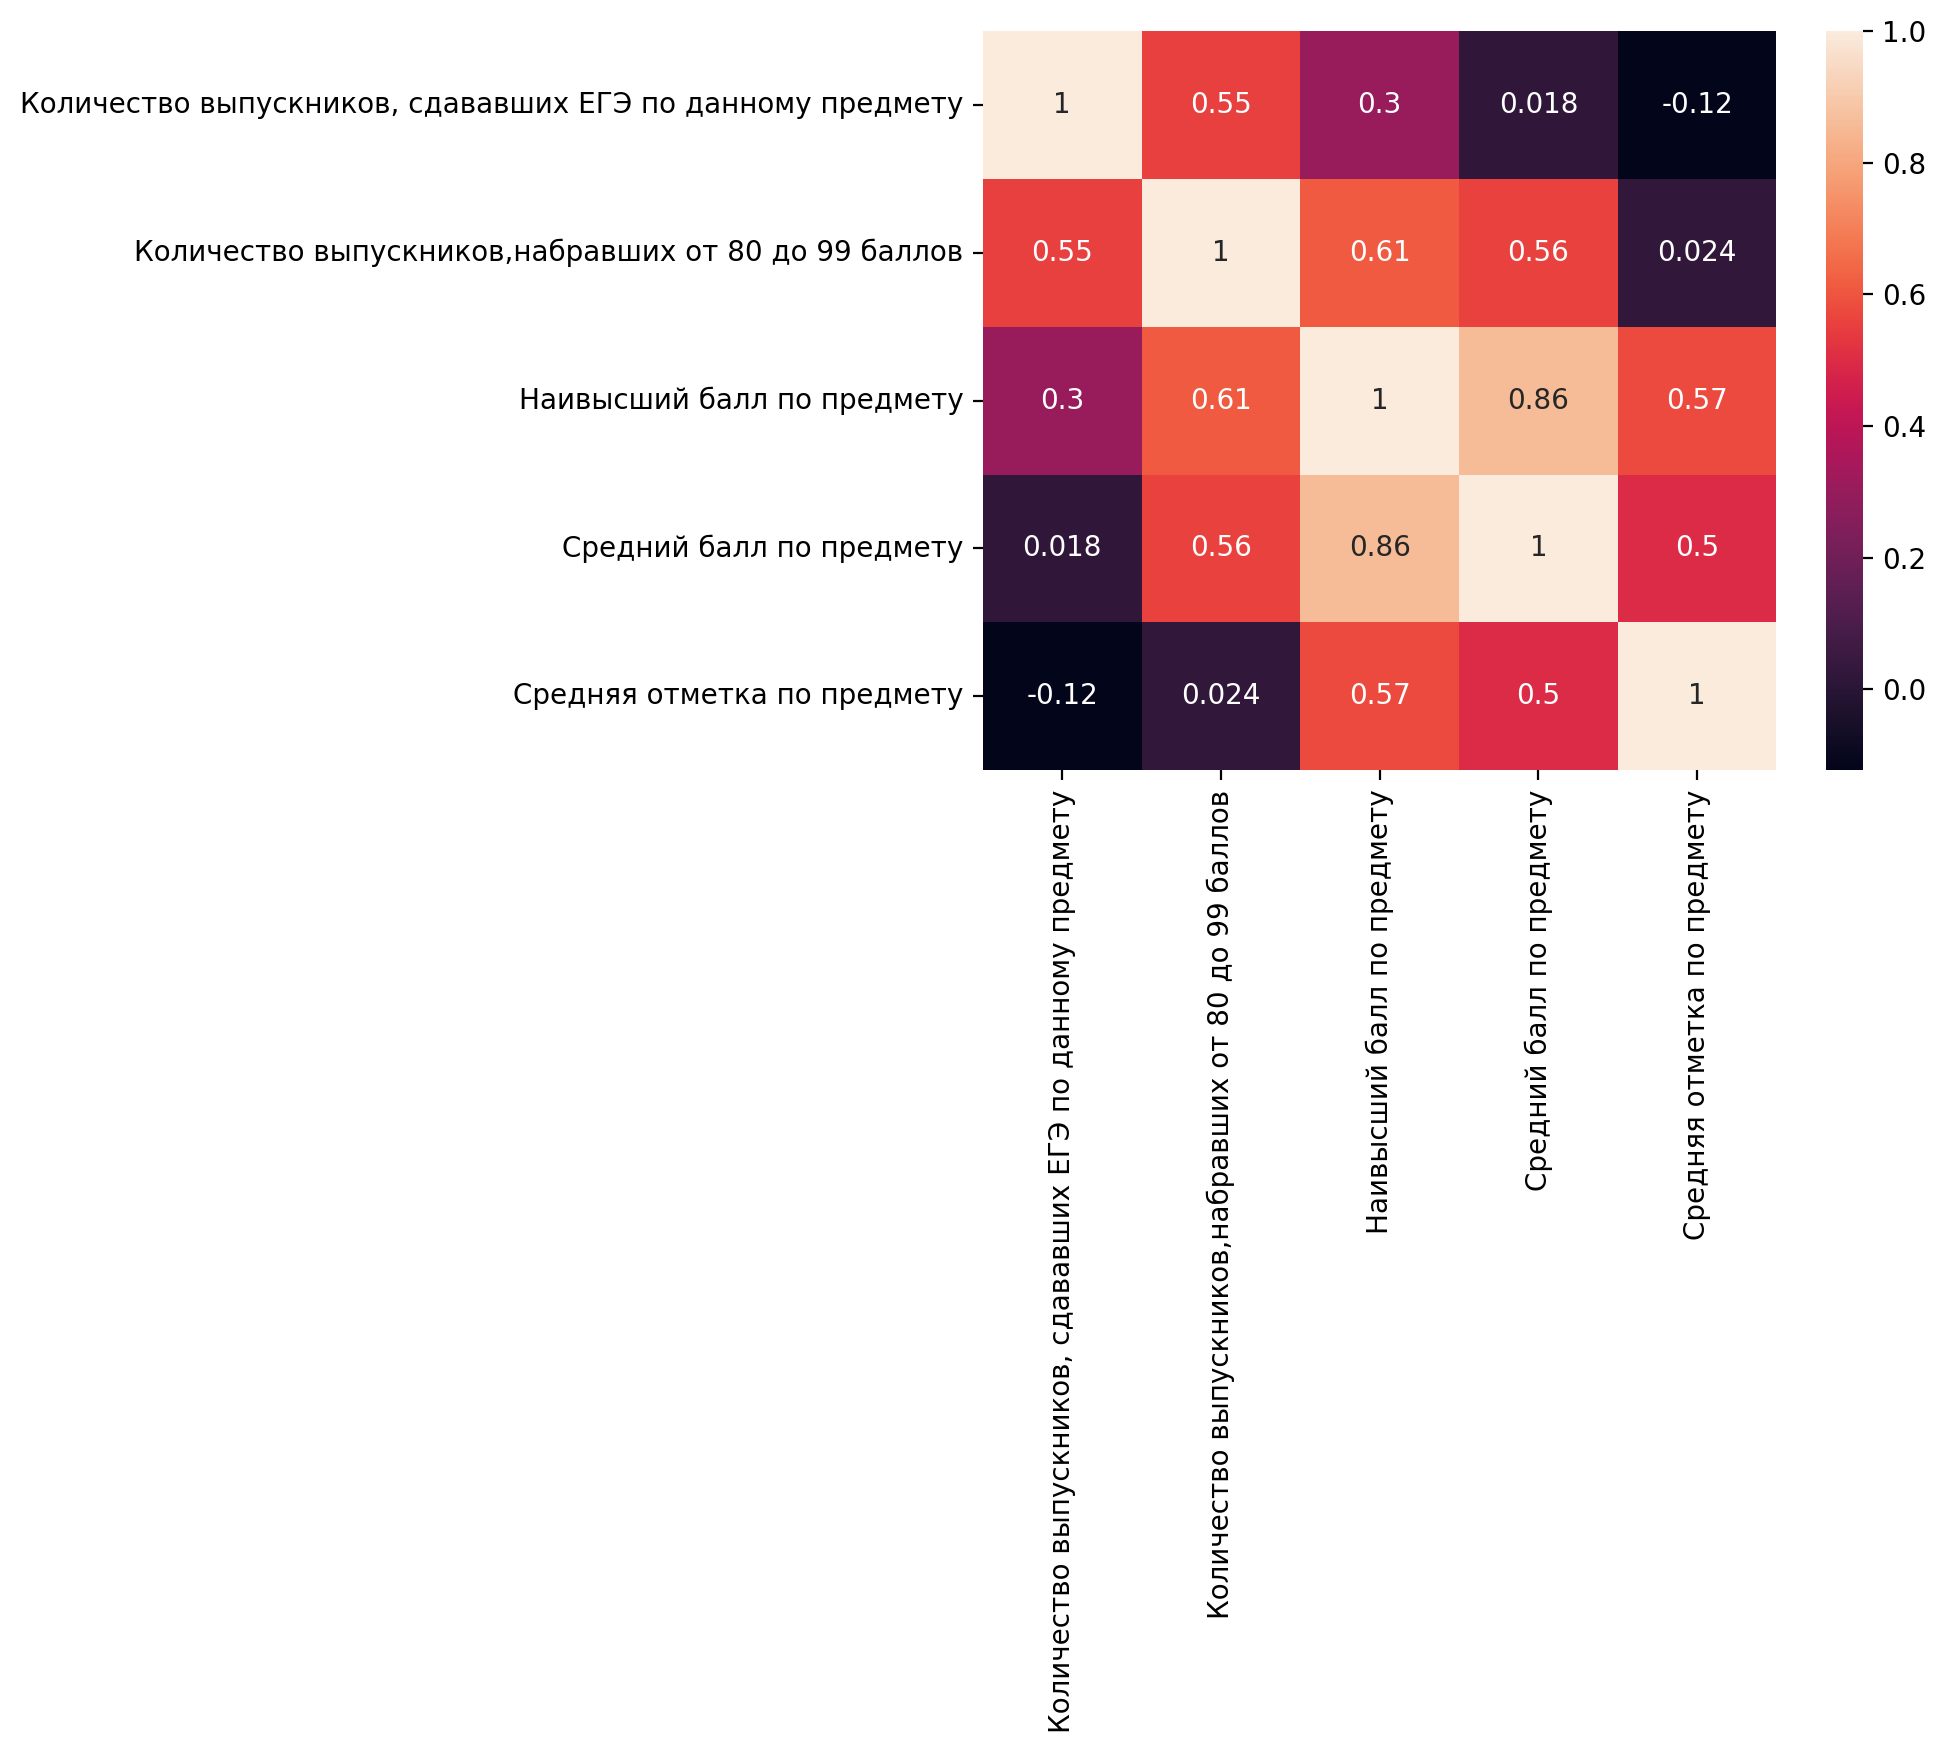

In [112]:
sns.heatmap(ds.corr(), annot=True)

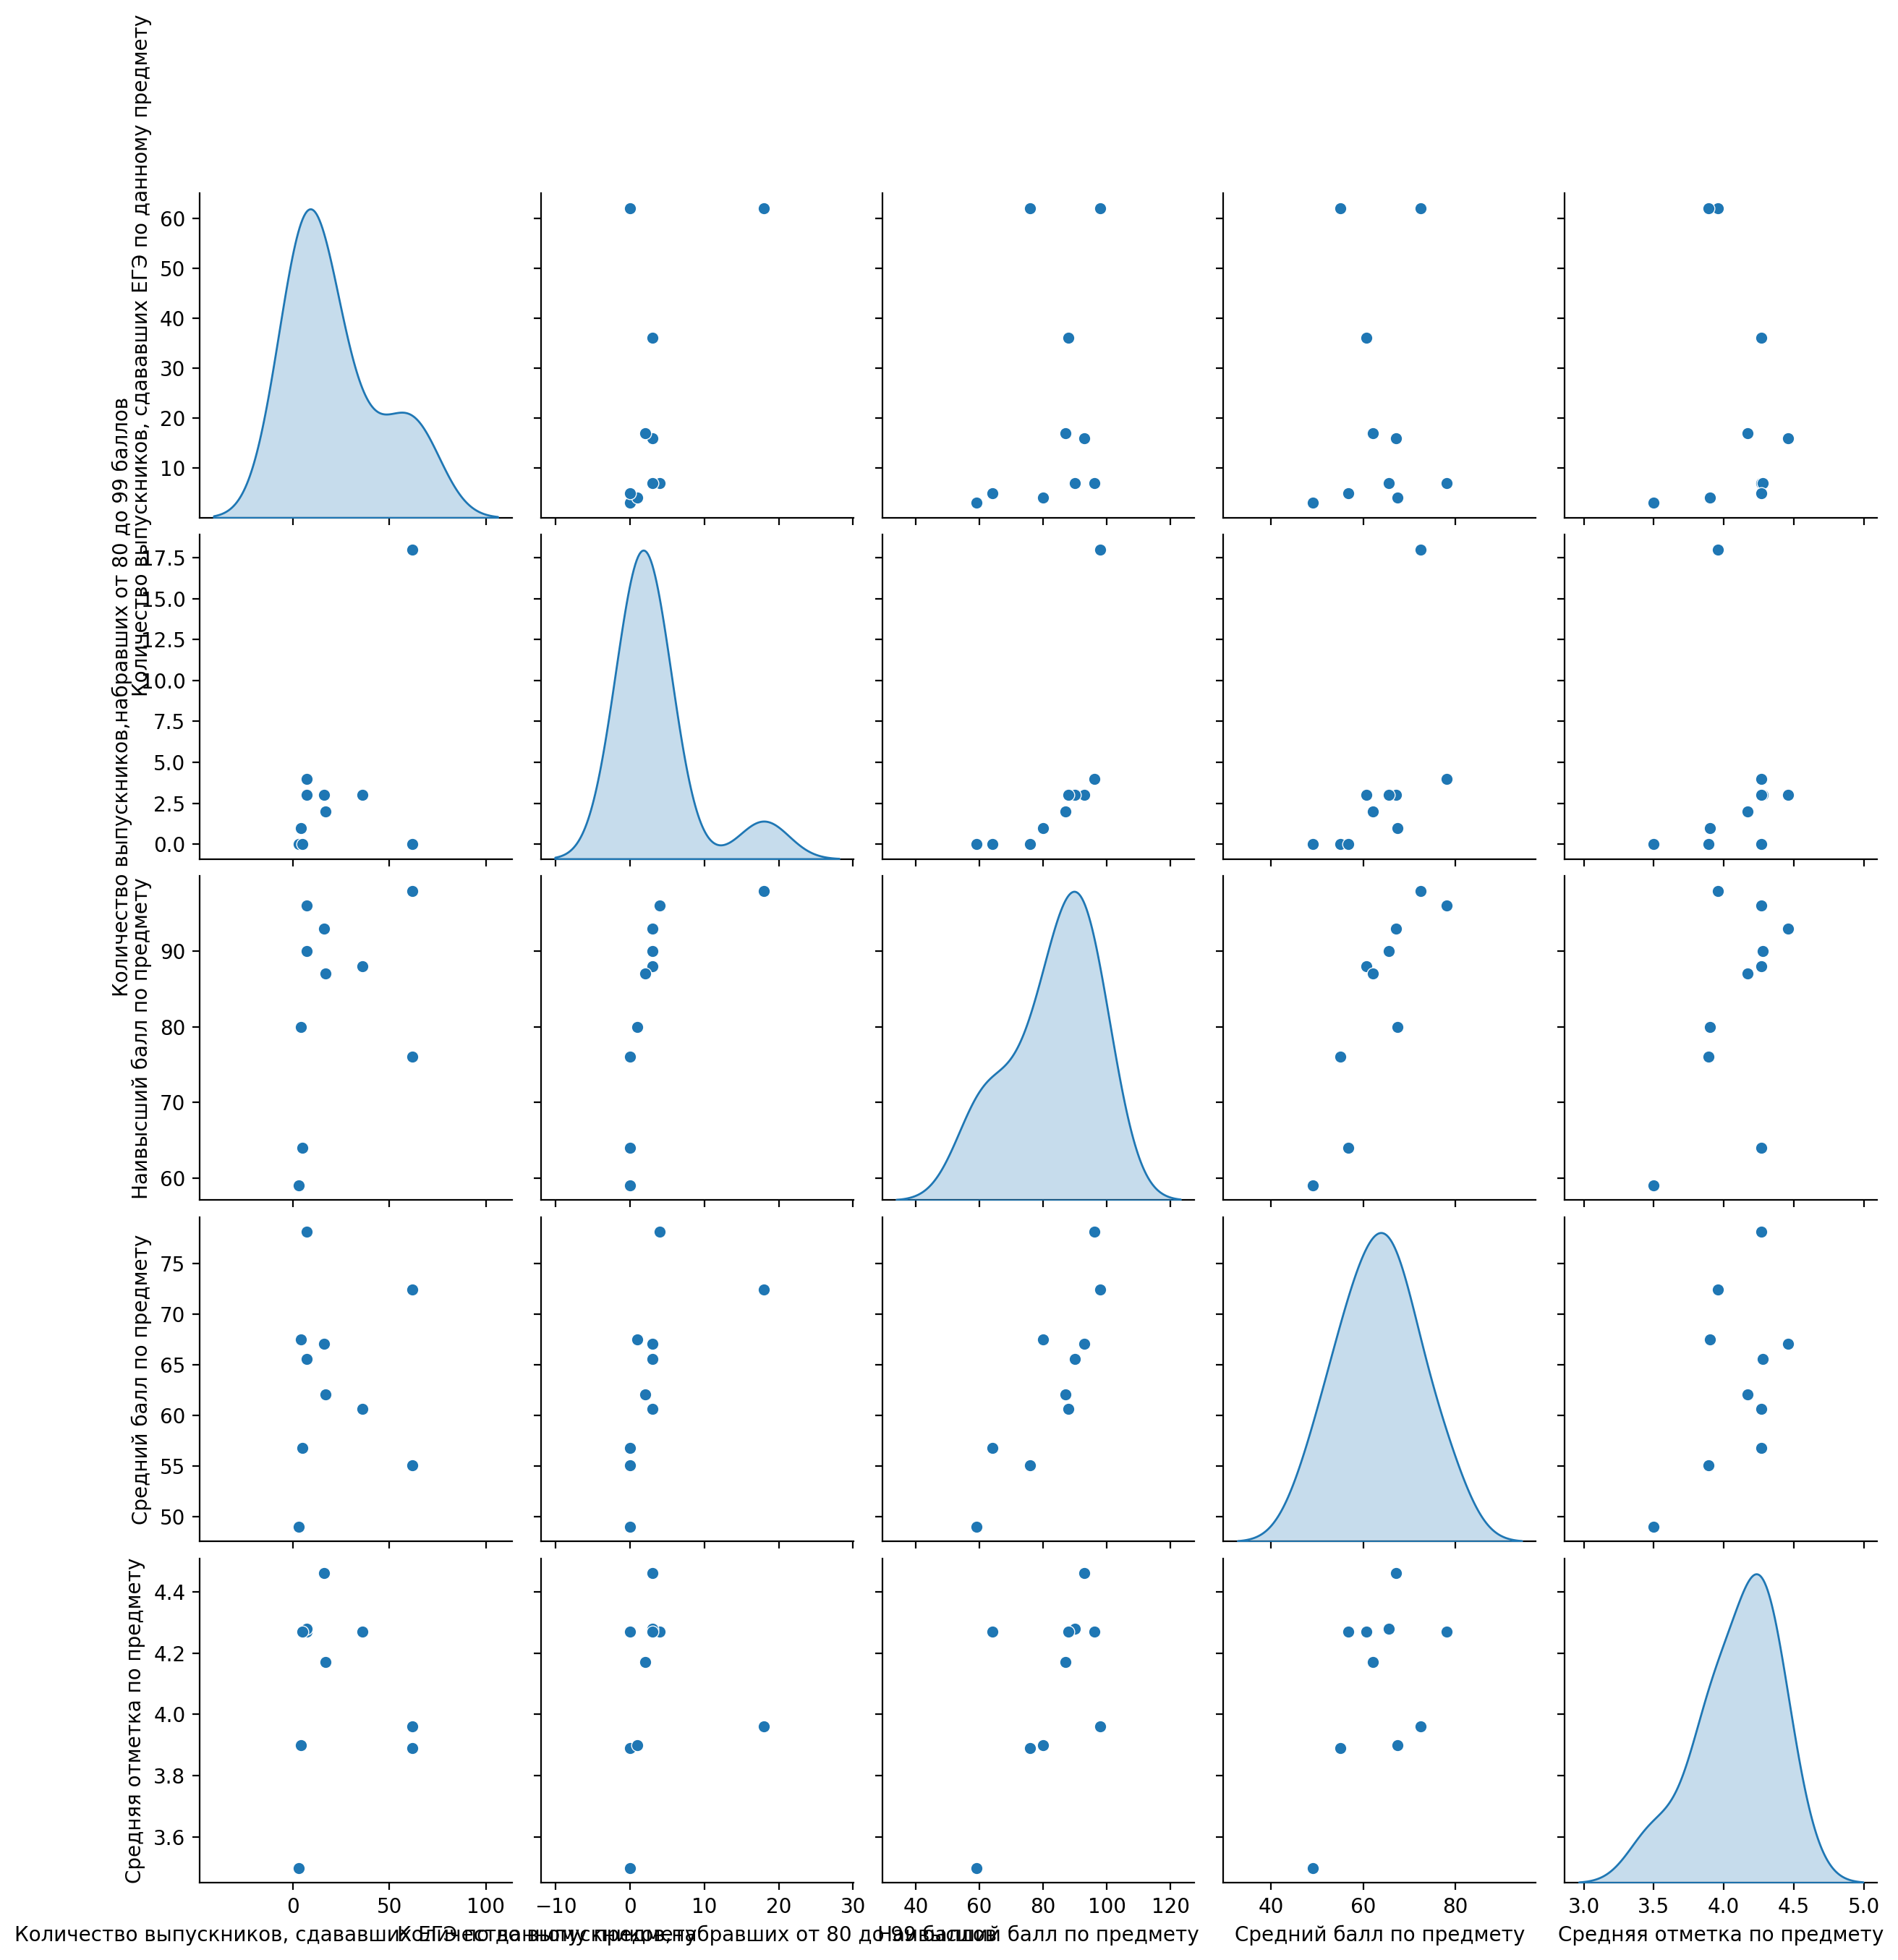

In [113]:
sns.pairplot(ds.head(100), diag_kind='kde')

In [114]:
#OneHotEncoding

In [115]:
from numpy import array
array = array(ds) 

In [116]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder()
transformed = one.fit_transform(ds[['Предмет']])
print(transformed.toarray())

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [117]:
df = ds.copy()
one = OneHotEncoder()
df_one = one.fit_transform(df[['Предмет']]) # по умолчанию возвращает разреженную матрицу
df_one = pd.DataFrame(df_one.todense(), columns=one.get_feature_names_out()) # приведем матрицу к плотному виду и создадим датафрейм

df_encoded = pd.concat([df.drop(df[['Предмет']], axis=1), df_one], axis=1) # объединяем изначальное числовые и закодированные колонки

In [118]:
df_encoded

,"Количество выпускников, сдававших ЕГЭ по данному предмету","Количество выпускников,набравших от 80 до 99 баллов",Наивысший балл по предмету,Средний балл по предмету,Средняя отметка по предмету,Предмет_Биология,Предмет_Иностранный язык (английский язык),Предмет_Информатика,Предмет_История,Предмет_Литература,Предмет_Математика,Предмет_Обществознание,Предмет_Русский язык,Предмет_Физика,Предмет_Химия
0,62,18,98,72.45,3.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7,4,96,78.14,4.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,16,3,93,67.06,4.46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,0,76,55.05,3.89,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,7,3,90,65.57,4.28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,36,3,88,60.64,4.27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,3,0,59,49.00,3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,4,1,80,67.50,3.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,5,0,64,56.80,4.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,17,2,87,62.06,4.17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
y = df_encoded[['Наивысший балл по предмету']]
x = df_encoded[['Количество выпускников, сдававших ЕГЭ по данному предмету',
       'Средняя отметка по предмету',
       'Средний балл по предмету',
       'Количество выпускников,набравших от 80 до 99 баллов']]

In [120]:
x.shape, y.shape

((10, 4), (10, 1))

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

In [122]:
x_train.shape, y_train.shape

((7, 4), (7, 1))

In [123]:
x_test.shape, y_test.shape

((3, 4), (3, 1))

In [124]:
#линейная регрессия

In [125]:
model = LinearRegression()

In [126]:
model.fit(x_train, y_train)

LinearRegression()

In [127]:
model.coef_

array([[0.14832781, 2.99470397, 1.23351654, 0.11870616]])

In [128]:
y_pred = model.predict(x_test)

In [152]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)

In [130]:
MAE

8.23359961820556

In [131]:
MSE

67.96105319561788

In [132]:
MAE / y_train.mean()

Наивысший балл по предмету    0.102372
dtype: float64

In [133]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [134]:
r2

-8.865314173557437

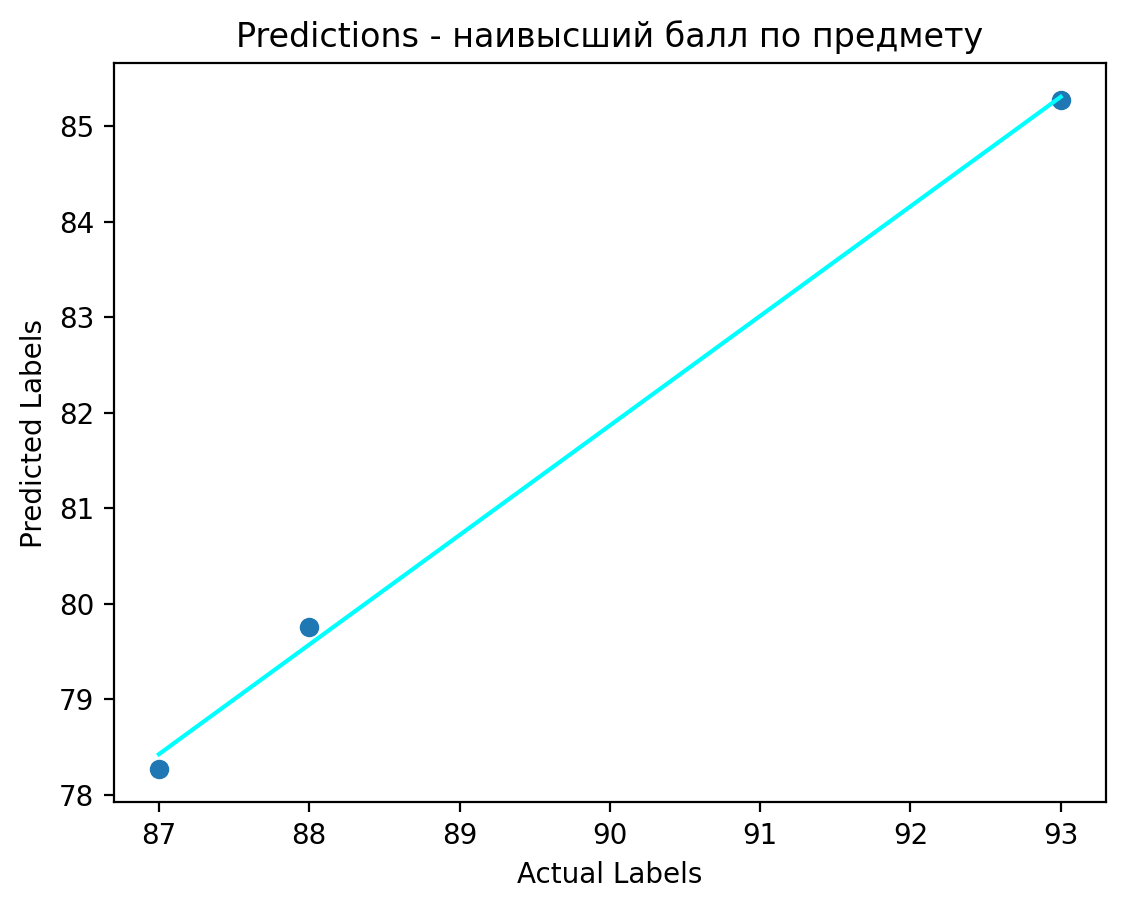

In [135]:
# прогнозируемый график в сравнении с фактическим
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions - наивысший балл по предмету')

# линия регрессии
z = np.polyfit(y_test.to_numpy().ravel(), pd.DataFrame(y_pred).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='cyan')
plt.savefig('reg')
plt.show()

In [136]:
#нейронная сеть

In [137]:
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD

In [139]:
print(tf.__version__)

2.11.1


In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
minmax = MinMaxScaler()

In [144]:
pd.DataFrame(minmax.fit_transform(df_encoded.values.reshape(-1, 1))).describe()

,0
count,150.000000
mean,0.120356
std,0.265523
min,0.000000
25%,0.000000
50%,0.000000
75%,0.040255
max,1.000000


In [145]:
x_train_minmax = minmax.fit_transform(x_train)
x_test_minmax = minmax.transform(x_test)

In [147]:
model = Sequential()

In [164]:
model.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

In [165]:
# определение гиперпараметров
learning_rate = 0.01
momentum = 0.0
nesterov = False

# компиляция модели
optimizer = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [166]:
# обучение модели
history = model.fit(x_train_minmax, y_train, 
                    batch_size = 10,
                    epochs = 50,
                    verbose = 1, 
                    validation_split = 0.3)

# оценка качества модели на тестовых данных
mse, mae = model.evaluate(x_test_minmax, y_test)
print(f'Mean Squared Error on test set: {mse:.3f}')
print(f'Mean Absolute Error on test set: {mae:.3f}')

# предсказание
y_pred = model.predict(x_test)

# cтатистика
mse_nn = mean_squared_error(y_test, y_pred)
mae_nn = mean_absolute_error(y_test, y_pred)
r2_nn = r2_score(y_test_minmax, y_pred)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 8330.0000 - mae: 91.0000 - val_loss: 4451.0000 - val_mae: 66.3333
Epoch 2/50
1/1 [==============================] - 0s 79ms/step - loss: 8330.0000 - mae: 91.0000 - val_loss: 4451.0000 - val_mae: 66.3333
Epoch 3/50
1/1 [==============================] - 0s 76ms/step - loss: 8330.0000 - mae: 91.0000 - val_loss: 4451.0000 - val_mae: 66.3333
Epoch 4/50
1/1 [==============================] - 0s 77ms/step - loss: 8330.0000 - mae: 91.0000 - val_loss: 4451.0000 - val_mae: 66.3333
Epoch 5/50
1/1 [==============================] - 0s 75ms/step - loss: 8330.0000 - mae: 91.0000 - val_loss: 4451.0000 - val_mae: 66.3333
Epoch 6/50
1/1 [==============================] - 0s 73ms/step - loss: 8330.0000 - mae: 91.0000 - val_loss: 4451.0000 - val_mae: 66.3333
Epoch 7/50
1/1 [==============================] - 0s 75ms/step - loss: 8330.0000 - mae: 91.0000 - val_loss: 4451.0000 - val_mae: 66.3333
Epoch 8/50
1/1 [===========================

NameError: name 'mean_squared_error' is not defined

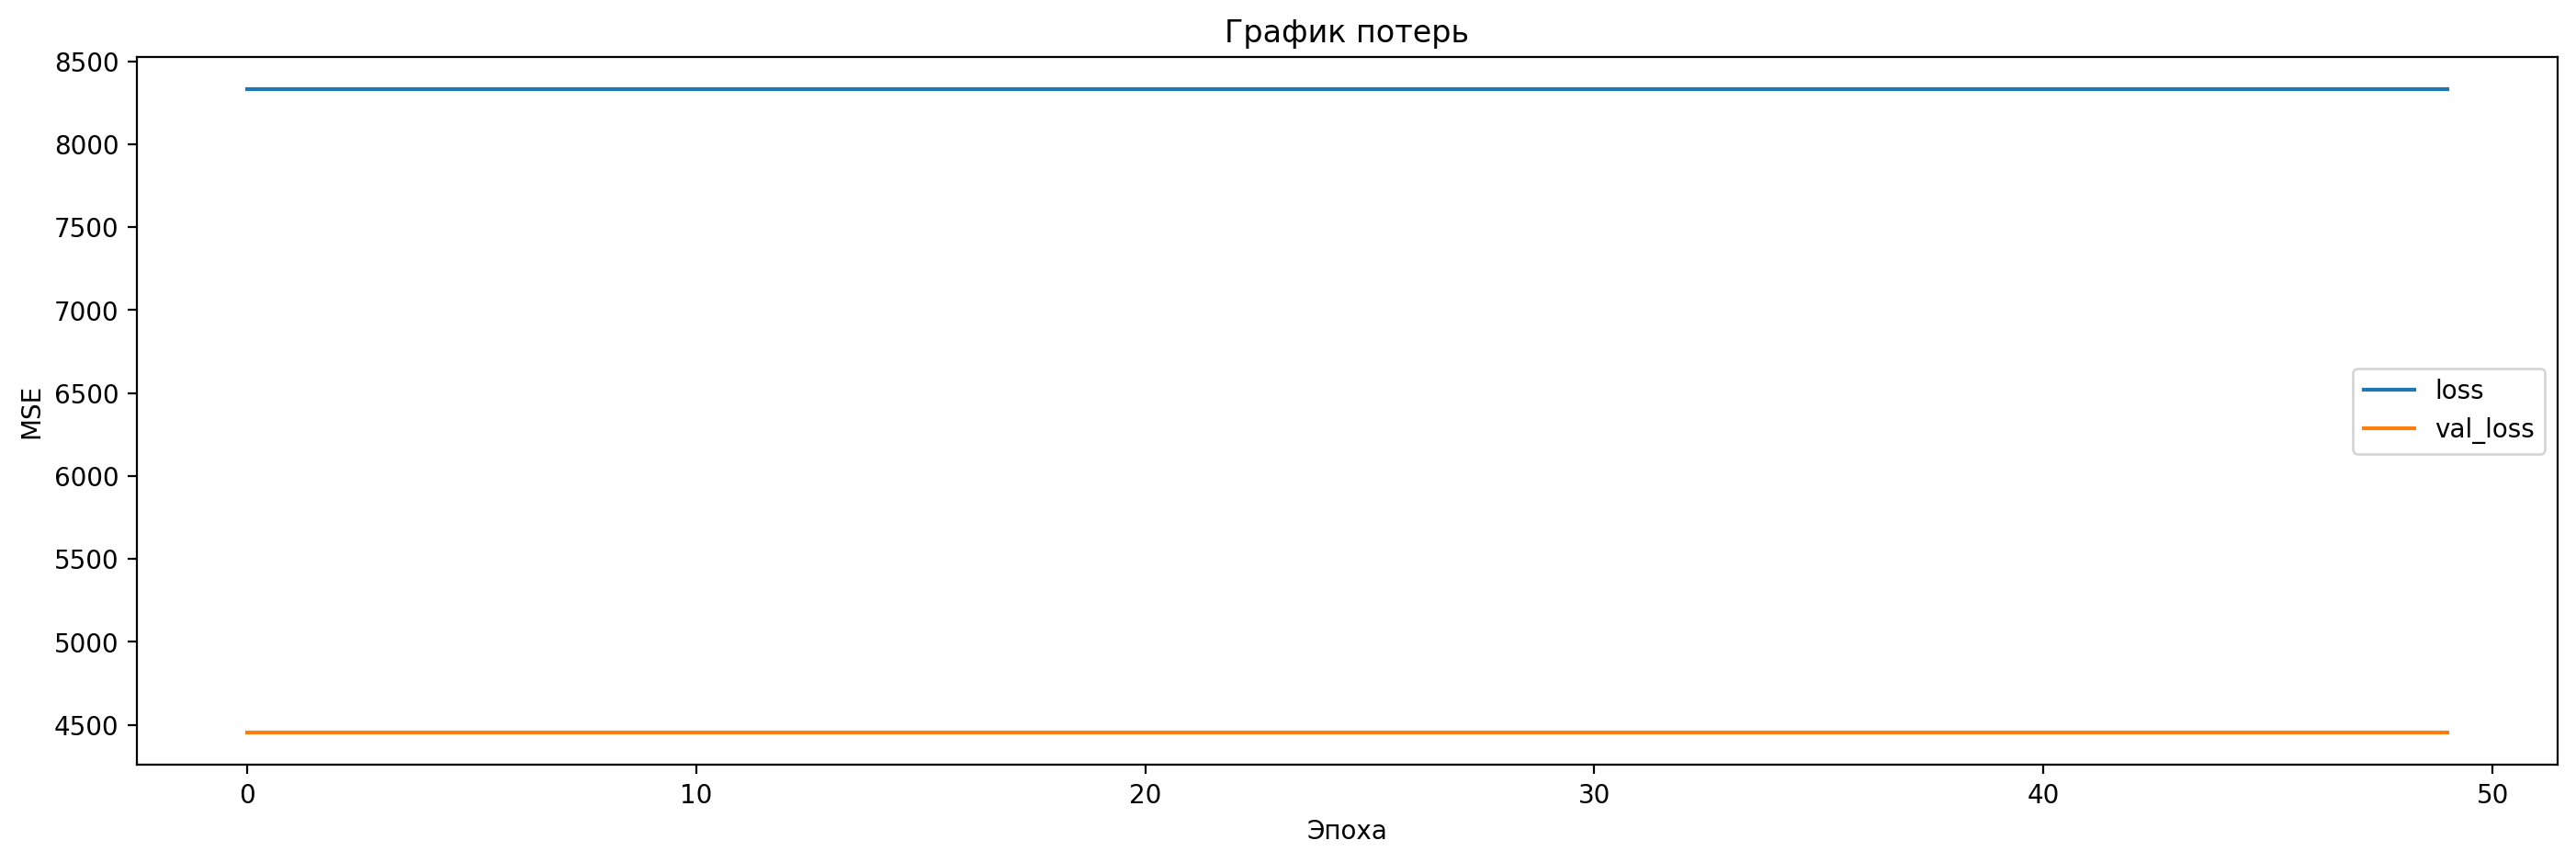

In [167]:
def model_loss_plot(history):
    plt.figure(figsize=(17,5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('График потерь')
    plt.ylabel('MSE')
    plt.xlabel('Эпоха')
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()
model_loss_plot(history)

In [168]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn import *

In [181]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 3]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=4, verbose=2)
GSCV.fit(x_train_minmax, y_train)

knn = GSCV_1.best_estimator_

# оценка качества модели
mse_k = mean_squared_error(y_test, knn.predict(x_test_minmax))
mae_k = mean_absolute_error(y_test, knn.predict(x_test_minmax))
r2_k = r2_score(y_test, knn.predict(x_test_minmax))

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


In [182]:
GSCV.best_params_

{'n_neighbors': 1}

In [183]:
r2_k

-0.06451612903225823

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()

# создание сетки параметров для перебора. подбор параметров
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth' : [4, 5, 6]
}

GSCV_rf_1 = GridSearchCV(rf_model, param_grid, cv=5, verbose=2)
GSCV_rf_1.fit(x_train_minmax, y_train)

# GSCV_rf_1.best_params_

rf_1 = GSCV_rf_1.best_estimator_

# оценка качества модели
mse_rf_1 = mean_squared_error(y_test, rf_1.predict(x_test_minmax))
mae_rf_1 = mean_absolute_error(y_test, rf_1.predict(x_test_minmax))
r2_rf_1 = r2_score(y_test, rf_1.predict(x_test_minmax))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined w

[CV] END .......................max_depth=4, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

[CV] END .......................max_depth=4, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......................max_depth=4, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......................max_depth=4, n_estimators=100; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......................max_depth=4, n_estimators=100; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\use

[CV] END ......................max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\use

[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\use

[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

[CV] END ......................max_depth=5, n_estimators=100; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=50; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

[CV] END .......................max_depth=6, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=50; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......................max_depth=6, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=6, n_estimators=100; total time=   0.2s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......................max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\use

[CV] END ......................max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=6, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=6, n_estimators=100; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [186]:
r2_rf_1

-0.943709677419351